In [432]:
import numpy as np
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

## EXERCISE 1

<div dir="rtl">
ضرایب بدست آمده در مثال کلاس را در نظر گرفته و خط معادل را با استفاده از matplotlib رسم کنید. با رسم نقاط واقعی در کنار خط، کیفیت خط را شرح دهید.
</div>

In [433]:
x = np.array([[2],[2.4],[5],[6]])
y = np.array([4,4.1,9.5,13])

In [434]:
ones = np.ones(x.shape)
x_new = np.concatenate((ones, x), axis=1)
teta = inv(x_new.T@x_new)@x_new.T@y
teta

array([-0.91935484,  2.22580645])

In [435]:
reg=LinearRegression()
reg.fit(x,y)
(reg.intercept_, reg.coef_)

(-0.9193548387096779, array([2.22580645]))

array([ 2.22580645, -0.91935484])

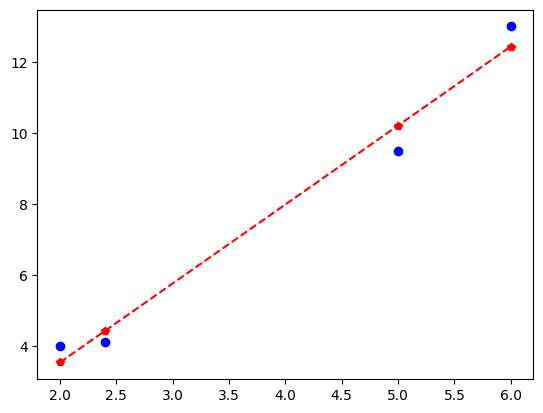

In [436]:
x_flat = x.flatten()
coef = np.polyfit(x_flat, y, 1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x_flat, y, 'ob', x_flat, poly1d_fn(x_flat), '--pr')
coef

<div dir="rtl">
 نقاط آبی رنگ، مقادیر واقعی و خط قرمز مقادیر پیش بینی شده هستند.
</div>

## EXERCISE 2

<div dir="rtl">
یک ستون از فایل FuelConsumption را به عنوان X و ستون CO2EMISSION را به عنوان y در نظر گرفته و رگرسیون خطی روی آن اعمال کنید. نتیجه را گزارش کنید.
</div>

In [437]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [438]:
y = df['CO2EMISSIONS']
x = df['FUELCONSUMPTION_CITY']

Text(0, 0.5, 'y')

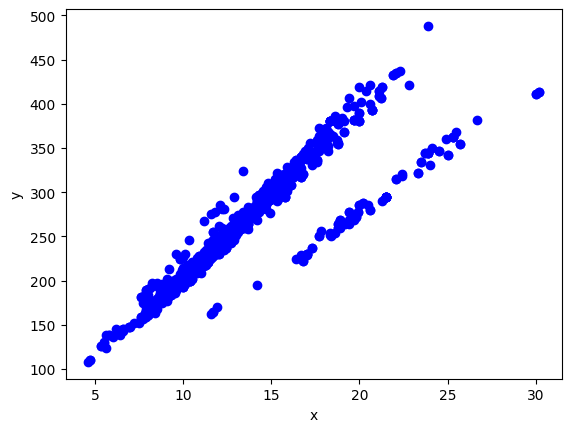

In [439]:
plt.scatter(x, y, color='blue')
plt.xlabel('x')
plt.ylabel('y')

<div dir="rtl">
روش گرادیان کاهشی - بدون استفاده از scikit-learn
</div>

In [440]:
m = 0
c = 0
learning_rate = 0.0001
iterations_num = 100
n = float(len(x))

for i in range(iterations_num): 
    predicted_y = m*x + c
    D_m = (-2/n) * sum(x * (y - predicted_y))  # Derivative m
    D_c = (-2/n) * sum(y - predicted_y)  # Derivative c
    m = m - learning_rate * D_m
    c = c - learning_rate * D_c
    
print (m, c)

18.35369842828155 1.3832562510070479


<div dir="rtl">
اولین مقدار، شیب (m) و دومین مقدار، عرض از مبدا (c) است.
</div>

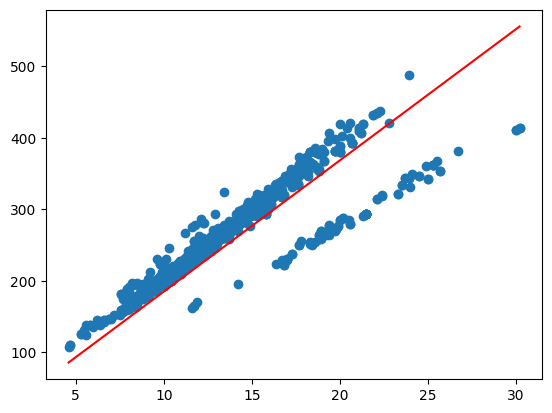

In [441]:
predicted_y = m*x + c

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(predicted_y), max(predicted_y)], color='red')
plt.show()

<div dir="rtl">
در این نمودار نقاط آبی رنگ، مقادیر واقعی و خط قرمز مقادیر پیش بینی شده هستند.
</div>

فرمول خطای میانگین مجذور  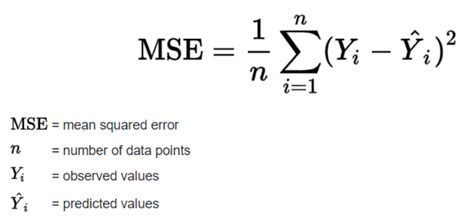

In [442]:
def MSE_loss(y, predicted_y):
    temp = 0
    input_size=len(x)
    for i in range(0, input_size):
        temp = temp + ((y[i] - predicted_y[i])**2)
        temp = temp /  input_size
    return(temp)

print(MSE_loss(y, predicted_y))

0.3439942048585272


## EXERCISE 3

<div dir="rtl">
 برای ماتریس چند بعدی زیر، ستون آخر را به عنوان خروجی (y) و مابقی را به عنوان ویژگی‌های مشاهدات(X) در نظر گرفته و یک رگرسیون خطی اعمال کرده و ضرایب را محاسبه کنید. 
</div>

In [443]:
numbers= np.array([[73, 67, 43, 56, 70],
                   [91, 88, 64, 81, 101],
                   [87, 134, 58, 119, 133],
                   [102, 43, 37, 22, 37],
                   [69, 96, 70, 103, 119]], dtype='float32')
numbers

array([[ 73.,  67.,  43.,  56.,  70.],
       [ 91.,  88.,  64.,  81., 101.],
       [ 87., 134.,  58., 119., 133.],
       [102.,  43.,  37.,  22.,  37.],
       [ 69.,  96.,  70., 103., 119.]], dtype=float32)

In [444]:
y = [row[-1] for row in numbers]
y_arr = np.array(y).reshape(-1, 1)

In [445]:
x_0 = [row[0] for row in numbers]
x_arr = np.array(x_0).reshape(-1, 1)

In [446]:
x_1 = [row[1] for row in numbers]
x_2 = [row[2] for row in numbers]
x_3 = [row[3] for row in numbers]

In [447]:
reg=LinearRegression()
reg.fit(x_arr,y_arr)
(reg.intercept_, reg.coef_)

(array([204.23157], dtype=float32), array([[-1.3297579]], dtype=float32))

{'coef_x0': array([ -1.32975798, 204.23157316]),
 'coef_x1': array([ 1.09135407, -1.41990817]),
 'coef_x2': array([  2.38479263, -37.73271889]),
 'coef_x3': array([ 1.00476448, 15.43694668])}

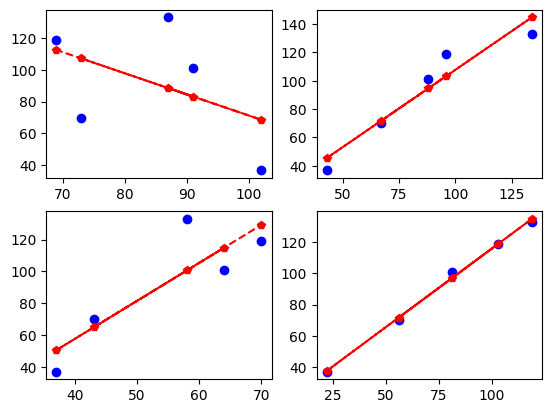

In [448]:
fig = plt.figure()

ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

coef_x0 = np.polyfit(x_0, y, 1)
poly1d_fn_x0 = np.poly1d(coef_x0) 

coef_x1 = np.polyfit(x_1, y, 1)
poly1d_fn_x1 = np.poly1d(coef_x1) 

coef_x2 = np.polyfit(x_2, y, 1)
poly1d_fn_x2 = np.poly1d(coef_x2) 

coef_x3 = np.polyfit(x_3, y, 1)
poly1d_fn_x3 = np.poly1d(coef_x3) 

ax1.plot(x_0, y, 'ob', x_0, poly1d_fn_x0(x_0), '--pr')
ax2.plot(x_1, y, 'ob', x_1, poly1d_fn_x1(x_1), '--pr')
ax3.plot(x_2, y, 'ob', x_2, poly1d_fn_x2(x_2), '--pr')
ax4.plot(x_3, y, 'ob', x_3, poly1d_fn_x3(x_3), '--pr')

{'coef_x0': coef_x0, 'coef_x1': coef_x1, 'coef_x2': coef_x2, 'coef_x3': coef_x3}